In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


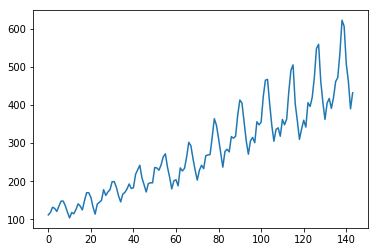

In [5]:
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
    skipfooter=3)
plt.plot(dataset)
plt.show()

In [6]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 47507.9577
Epoch 2/200
0s - loss: 41607.3601
Epoch 3/200
0s - loss: 35652.0769
Epoch 4/200
0s - loss: 29448.9039
Epoch 5/200
0s - loss: 23374.0745
Epoch 6/200
0s - loss: 17686.6740
Epoch 7/200
0s - loss: 12751.8471
Epoch 8/200
0s - loss: 8665.6855
Epoch 9/200
0s - loss: 5578.5506
Epoch 10/200
0s - loss: 3430.4706
Epoch 11/200
0s - loss: 2067.1246
Epoch 12/200
0s - loss: 1290.3345
Epoch 13/200
0s - loss: 867.7945
Epoch 14/200
0s - loss: 675.5000
Epoch 15/200
0s - loss: 585.4234
Epoch 16/200
0s - loss: 555.2569
Epoch 17/200
0s - loss: 546.7353
Epoch 18/200
0s - loss: 547.3991
Epoch 19/200
0s - loss: 538.8404
Epoch 20/200
0s - loss: 538.5291
Epoch 21/200
0s - loss: 536.9763
Epoch 22/200
0s - loss: 536.0235
Epoch 23/200
0s - loss: 537.1176
Epoch 24/200
0s - loss: 535.7789
Epoch 25/200
0s - loss: 538.2010
Epoch 26/200
0s - loss: 538.4625
Epoch 27/200
0s - loss: 538.2213
Epoch 28/200
0s - loss: 537.3735
Epoch 29/200
0s - loss: 538.2754
Epoch 30/200
0s - loss: 539.0428


In [12]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.08 MSE (48.53 RMSE)


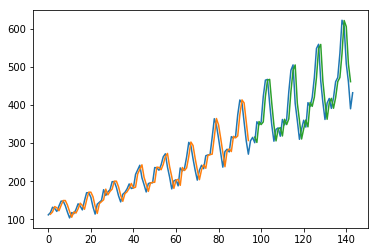

In [13]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()